# Ejercicio de Evaluación. Descriptiva e Inferencia.

## Ejercicio 1. Apartado a)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.stats import kstest, norm

In [4]:
ruta_archivo = 'datosejercicioevaluacionanchuras.xlsx'  
datos = pd.read_excel(ruta_archivo)
datos.head()

,Época histórica,Anchura del cráneo
0,1,133
1,1,131
2,1,131
3,1,132
4,1,134


In [7]:
predinastico_temprano = datos[datos['Época histórica'] == 1]['Anchura del cráneo']
predinastico_tardio = datos[datos['Época histórica'] == 2]['Anchura del cráneo']

In [9]:
def calcular_estadisticas(serie):
    estadisticas = {
        'Media': np.mean(serie),
        'Mediana': np.median(serie),
        'Varianza': np.var(serie, ddof=1),
        'Desviación estándar': np.std(serie, ddof=1),
        'Coeficiente de variación (%)': (np.std(serie, ddof=1) / np.mean(serie)) * 100,
        'Asimetría': skew(serie),
        'Curtosis': kurtosis(serie)
    }
    return estadisticas

In [11]:
estadisticas_temprano = calcular_estadisticas(predinastico_temprano)
estadisticas_tardio = calcular_estadisticas(predinastico_tardio)

# Mostrar resultados
print("Estadísticas para el periodo predinástico temprano:")
for k, v in estadisticas_temprano.items():
    print(f"{k}: {v:.2f}")
print("\nEstadísticas para el periodo predinástico tardío:")
for k, v in estadisticas_tardio.items():
    print(f"{k}: {v:.2f}")

Estadísticas para el periodo predinástico temprano:
Media: 131.53
Mediana: 131.50
Varianza: 0.67
Desviación estándar: 0.82
Coeficiente de variación (%): 0.62
Asimetría: 0.66
Curtosis: 1.30

Estadísticas para el periodo predinástico tardío:
Media: 132.47
Mediana: 133.00
Varianza: 1.02
Desviación estándar: 1.01
Coeficiente de variación (%): 0.76
Asimetría: 0.20
Curtosis: -0.19


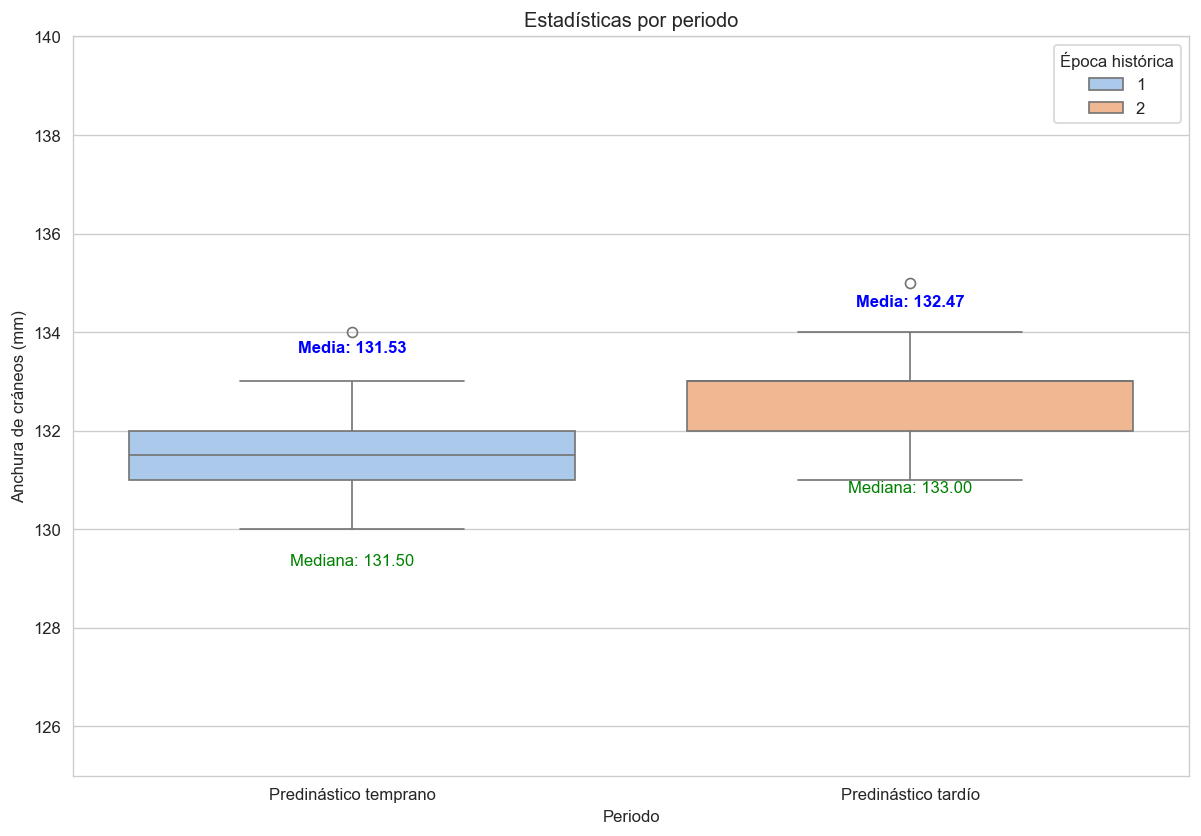

In [13]:
plt.figure(figsize=(12, 8), dpi=120)  
sns.set_style("whitegrid") 

sns.boxplot(
    x='Época histórica',
    y='Anchura del cráneo',
    data=datos,
    palette='pastel',
    hue='Época histórica',
    dodge=False
)

for i, periodo in enumerate(['Predinástico temprano', 'Predinástico tardío']):
    estadisticas = estadisticas_temprano if i == 0 else estadisticas_tardio
    media = estadisticas['Media']
    mediana = estadisticas['Mediana']

    plt.text(
        x=i, y=media + 2, 
        s=f"Media: {media:.2f}",
        color='blue',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

    plt.text(
        x=i, y=mediana - 2,  
        s=f"Mediana: {mediana:.2f}",
        color='green',
        ha='center',
        va='top',
        fontsize=10
    )

# Etiquetas y título
plt.xticks([0, 1], ['Predinástico temprano', 'Predinástico tardío'])
plt.xlabel('Periodo')
plt.ylabel('Anchura de cráneos (mm)')
plt.title('Estadísticas por periodo')

plt.ylim(min(datos['Anchura del cráneo']) - 5, max(datos['Anchura del cráneo']) + 5)
plt.show()

## Apartado b)

In [16]:
from scipy.stats import kstest, norm

# Normalizar las submuestras
temprano_normalizado = (predinastico_temprano - predinastico_temprano.mean()) / predinastico_temprano.std()
tardio_normalizado = (predinastico_tardio - predinastico_tardio.mean()) / predinastico_tardio.std()

# Test de Kolmogorov-Smirnov
ks_temprano = kstest(temprano_normalizado, 'norm')
print("Test K-S para el periodo predinástico temprano:")
print(f"Estadístico D: {ks_temprano.statistic:.4f}")
print(f"P-valor: {ks_temprano.pvalue:.4f}")

ks_tardio = kstest(tardio_normalizado, 'norm')
print("\nTest K-S para el periodo predinástico tardío:")
print(f"Estadístico D: {ks_tardio.statistic:.4f}")
print(f"P-valor: {ks_tardio.pvalue:.4f}")

# Interpretación
if ks_temprano.pvalue > 0.05:
    print("\nLa submuestra del periodo predinástico temprano podría seguir una distribución normal.")
else:
    print("\nLa submuestra del periodo predinástico temprano no sigue una distribución normal.")

if ks_tardio.pvalue > 0.05:
    print("\nLa submuestra del periodo predinástico tardío podría seguir una distribución normal.")
else:
    print("\nLa submuestra del periodo predinástico tardío no sigue una distribución normal.")


Test K-S para el periodo predinástico temprano:
Estadístico D: 0.2425
P-valor: 0.0489

Test K-S para el periodo predinástico tardío:
Estadístico D: 0.2350
P-valor: 0.0611

La submuestra del periodo predinástico temprano no sigue una distribución normal.

La submuestra del periodo predinástico tardío podría seguir una distribución normal.


## Ejercicio 2. Apartado a)

In [19]:
from scipy.stats import norm

# Estadísticas descriptivas
n_temprano = len(predinastico_temprano)
n_tardio = len(predinastico_tardio)

mean_temprano = predinastico_temprano.mean()
mean_tardio = predinastico_tardio.mean()

std_temprano = predinastico_temprano.std(ddof=1)
std_tardio = predinastico_tardio.std(ddof=1)

# Diferencia de medias
diff_means = mean_tardio - mean_temprano

# Error estándar
se_diff = np.sqrt((std_temprano**2 / n_temprano) + (std_tardio**2 / n_tardio))

# Niveles de confianza
confidence_levels = [0.9, 0.95, 0.99]

for confidence in confidence_levels:
    z_critical = norm.ppf(1 - (1 - confidence) / 2)
    margin_error = z_critical * se_diff
    ic_lower = diff_means - margin_error
    ic_upper = diff_means + margin_error
    print(f"Nivel de confianza: {confidence*100:.1f}%")
    print(f"Intervalo de confianza: ({ic_lower:.2f}, {ic_upper:.2f})\n")

Nivel de confianza: 90.0%
Intervalo de confianza: (0.54, 1.32)

Nivel de confianza: 95.0%
Intervalo de confianza: (0.47, 1.40)

Nivel de confianza: 99.0%
Intervalo de confianza: (0.32, 1.54)



## Apartado b)

In [22]:
from scipy.stats import ttest_ind, levene

# Test de Levene para igualdad de varianzas
levene_stat, levene_p = levene(predinastico_temprano, predinastico_tardio)
print(f"Test de Levene para igualdad de varianzas:")
print(f"Estadístico: {levene_stat:.4f}, p-valor: {levene_p:.4f}")

# Test t para la diferencia de medias
t_stat_equal, p_value_equal = ttest_ind(
    predinastico_temprano, predinastico_tardio, equal_var=True
)
t_stat_unequal, p_value_unequal = ttest_ind(
    predinastico_temprano, predinastico_tardio, equal_var=False
)

# Mostrar resultados
print("\nTest t asumiendo varianzas iguales:")
print(f"Estadístico t: {t_stat_equal:.4f}, p-valor: {p_value_equal:.4f}")

print("\nTest t asumiendo varianzas desiguales:")
print(f"Estadístico t: {t_stat_unequal:.4f}, p-valor: {p_value_unequal:.4f}")

# Interpretación
if p_value_equal > 0.05:
    print("\nNo se rechaza la hipótesis nula asumiendo varianzas iguales: las medias pueden ser iguales.")
else:
    print("\nSe rechaza la hipótesis nula asumiendo varianzas iguales: las medias son significativamente diferentes.")

if p_value_unequal > 0.05:
    print("\nNo se rechaza la hipótesis nula asumiendo varianzas desiguales: las medias pueden ser iguales.")
else:
    print("\nSe rechaza la hipótesis nula asumiendo varianzas desiguales: las medias son significativamente diferentes.")


Test de Levene para igualdad de varianzas:
Estadístico: 0.6195, p-valor: 0.4344

Test t asumiendo varianzas iguales:
Estadístico t: -3.9354, p-valor: 0.0002

Test t asumiendo varianzas desiguales:
Estadístico t: -3.9354, p-valor: 0.0002

Se rechaza la hipótesis nula asumiendo varianzas iguales: las medias son significativamente diferentes.

Se rechaza la hipótesis nula asumiendo varianzas desiguales: las medias son significativamente diferentes.
